# Importing Dataset from Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Dataset path
DATASET_PATH = os.environ.get("TWITTER_STOCK_CSV", "/content/drive/MyDrive/datasets/Twitter Stock Market Dataset.csv")

df = pd.read_csv(DATASET_PATH, encoding="utf-8")


# Data Preprocessing & Exploratory Data Analysis (EDA)

In [3]:
print("df.info():")
print(df.info())

df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2264 non-null   object 
 1   Open       2259 non-null   float64
 2   High       2259 non-null   float64
 3   Low        2259 non-null   float64
 4   Close      2259 non-null   float64
 5   Adj Close  2259 non-null   float64
 6   Volume     2259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 123.9+ KB
None


In [4]:
print("\ndf.isnull().sum():")
print(df.isnull().sum())


df.isnull().sum():
Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64


In [5]:
print("\ndf.shape:")
print(df.shape)


df.shape:
(2264, 7)


# Twitter Stock Closing Price Over Time

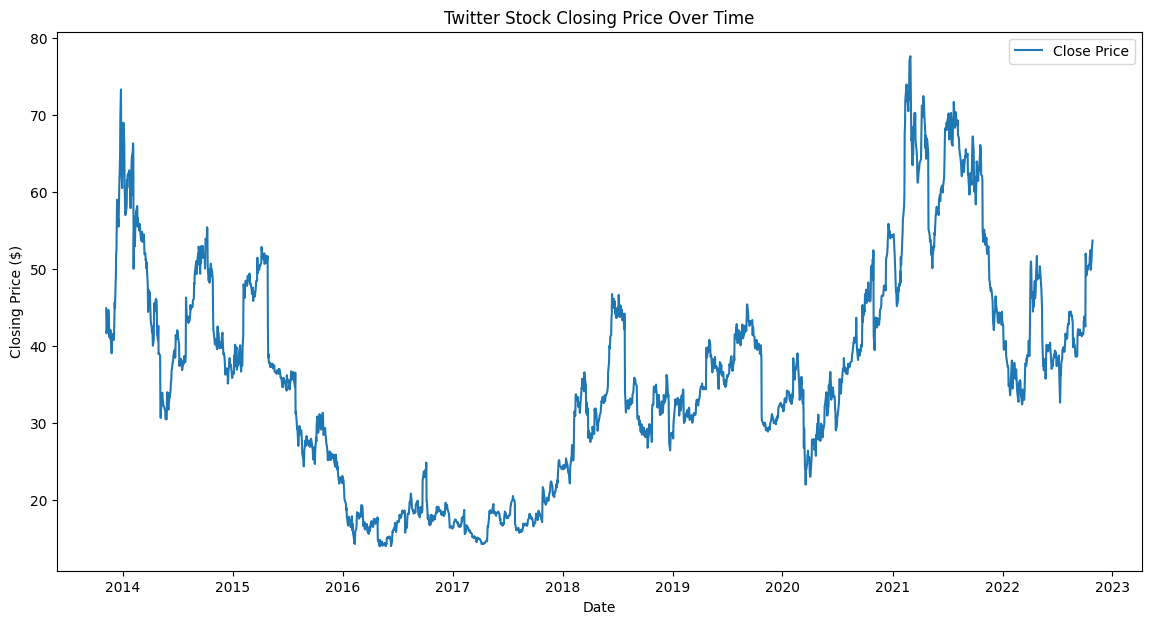

In [6]:
# Converting the 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Plot the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(df["Date"]), df["Close"], label="Close Price")
plt.title("Twitter Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.legend()
plt.show()


# Volume of Twitter Stocks Traded Over Time

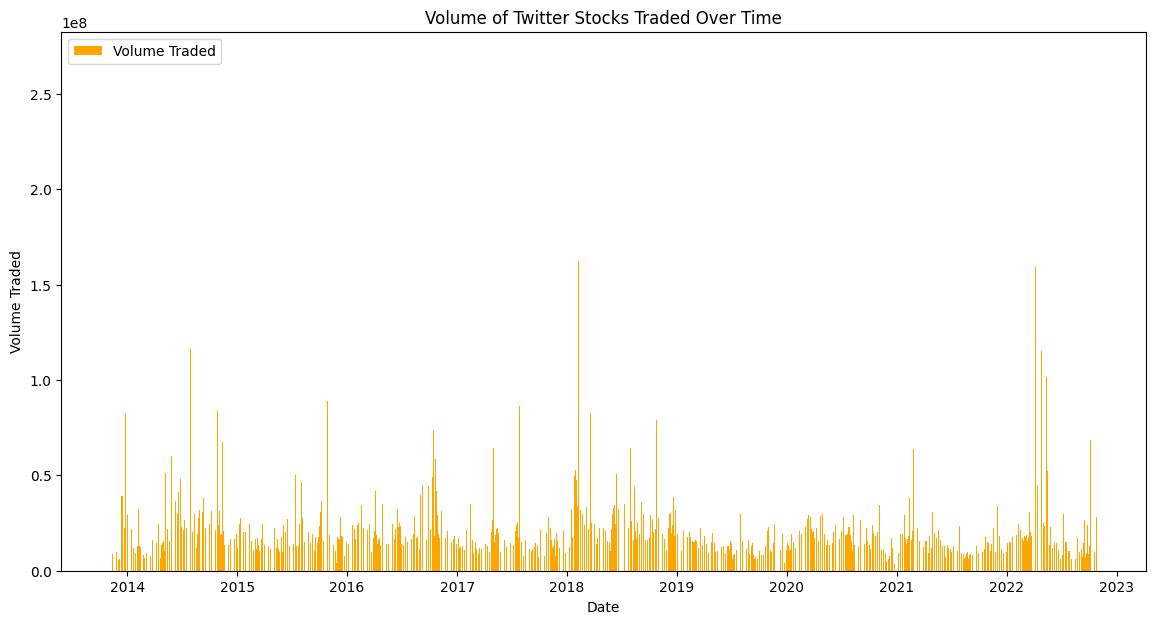

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

plt.figure(figsize=(14, 7))
plt.bar(df["Date"], df["Volume"], label="Volume Traded", color="orange")
plt.title("Volume of Twitter Stocks Traded Over Time")
plt.xlabel("Date")
plt.ylabel("Volume Traded")
plt.legend()
plt.show()


# Distribution of Close Prices

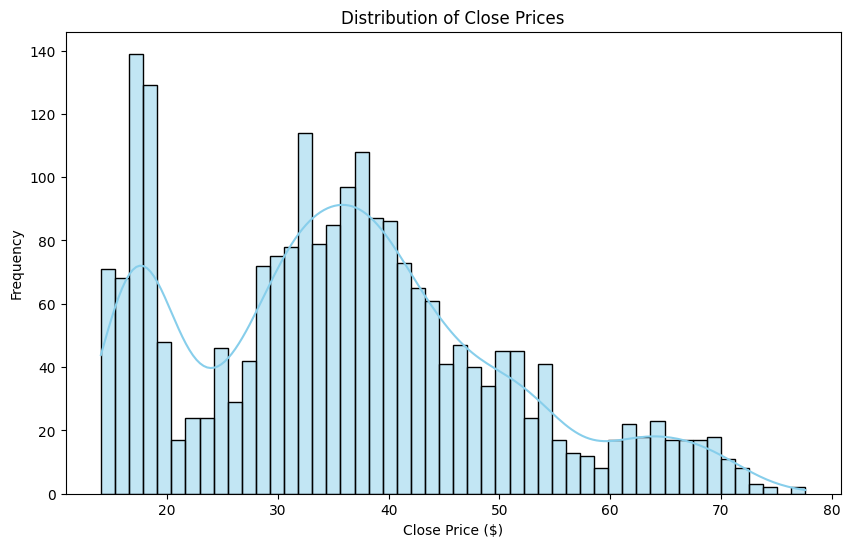

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Close"], bins=50, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of Close Prices")
plt.xlabel("Close Price ($)")
plt.ylabel("Frequency")
plt.show()


# Box Plot of Close Prices

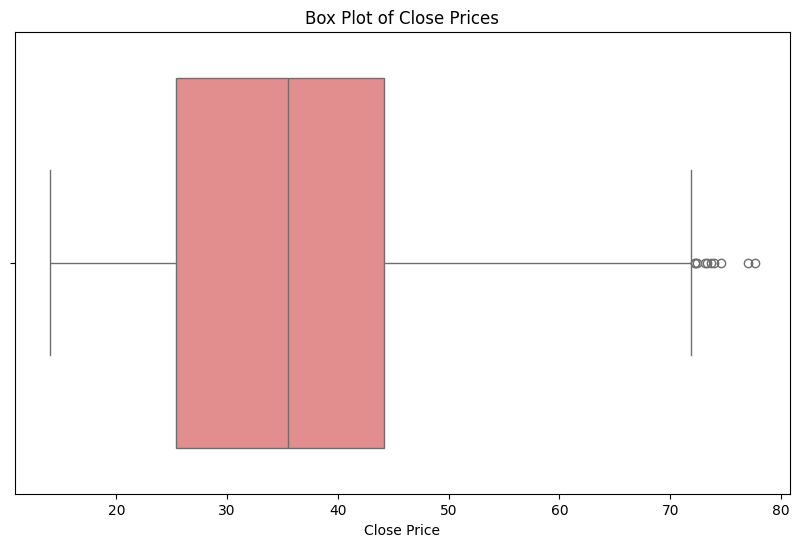

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Close"], color="lightcoral")
plt.title("Box Plot of Close Prices")
plt.xlabel("Close Price")
plt.show()


# Scatter Plot of Close Prices and Volume of Trades

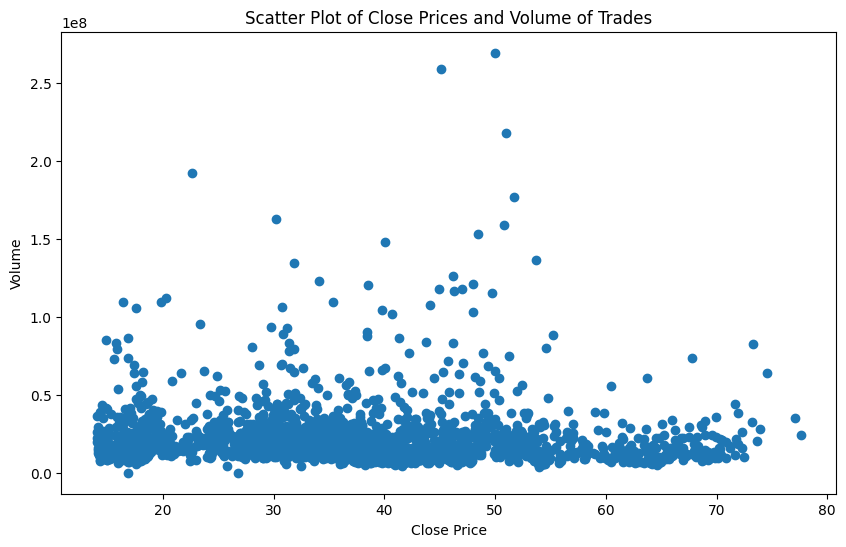

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Close"], df["Volume"])
plt.title("Scatter Plot of Close Prices and Volume of Trades")
plt.xlabel("Close Price")
plt.ylabel("Volume")
plt.show()


# Correlation Heatmap

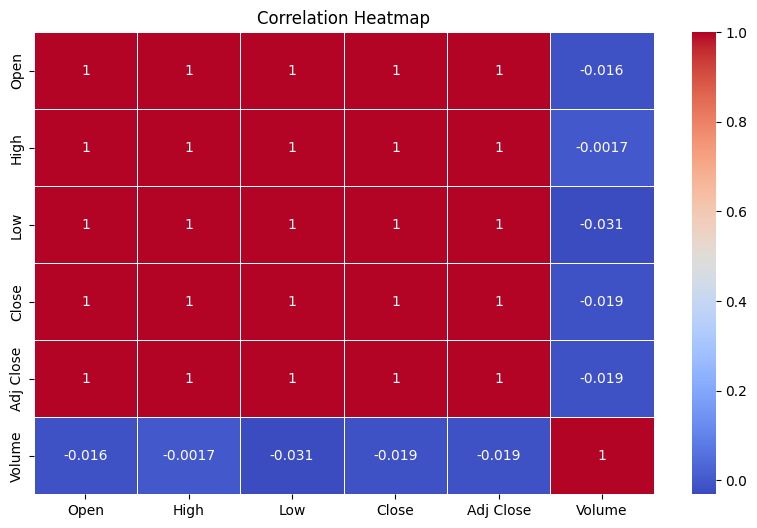

In [11]:
# Excluding non-numeric columns from the correlation calculation
df_numeric = df.select_dtypes(include=[np.number])

# Ploting a heatmap to visualize the correlation between numeric attributes
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# 30-day moving average of Close Prices

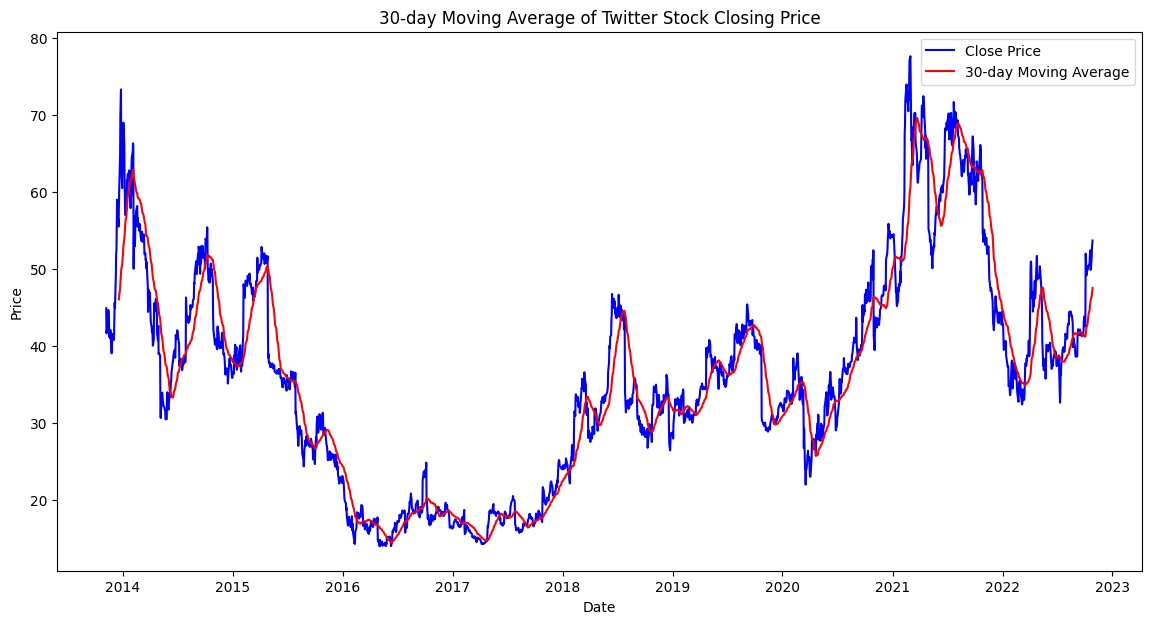

In [12]:
# Calculating the 30-day moving average of the closing prices
df["30_day_MA"] = df["Close"].rolling(window=30).mean()

# Ploting for the 30-day moving average of the closing prices
plt.figure(figsize=(14, 7))
plt.plot(df["Date"], df["Close"], label="Close Price", color="blue")
plt.plot(df["Date"], df["30_day_MA"], label="30-day Moving Average", color="red")
plt.title("30-day Moving Average of Twitter Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Seasonal Decomposition

In [31]:
!pip install statsmodels

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       '30_day_MA'],
      dtype='object')

In [34]:
df.index

RangeIndex(start=0, stop=2264, step=1)

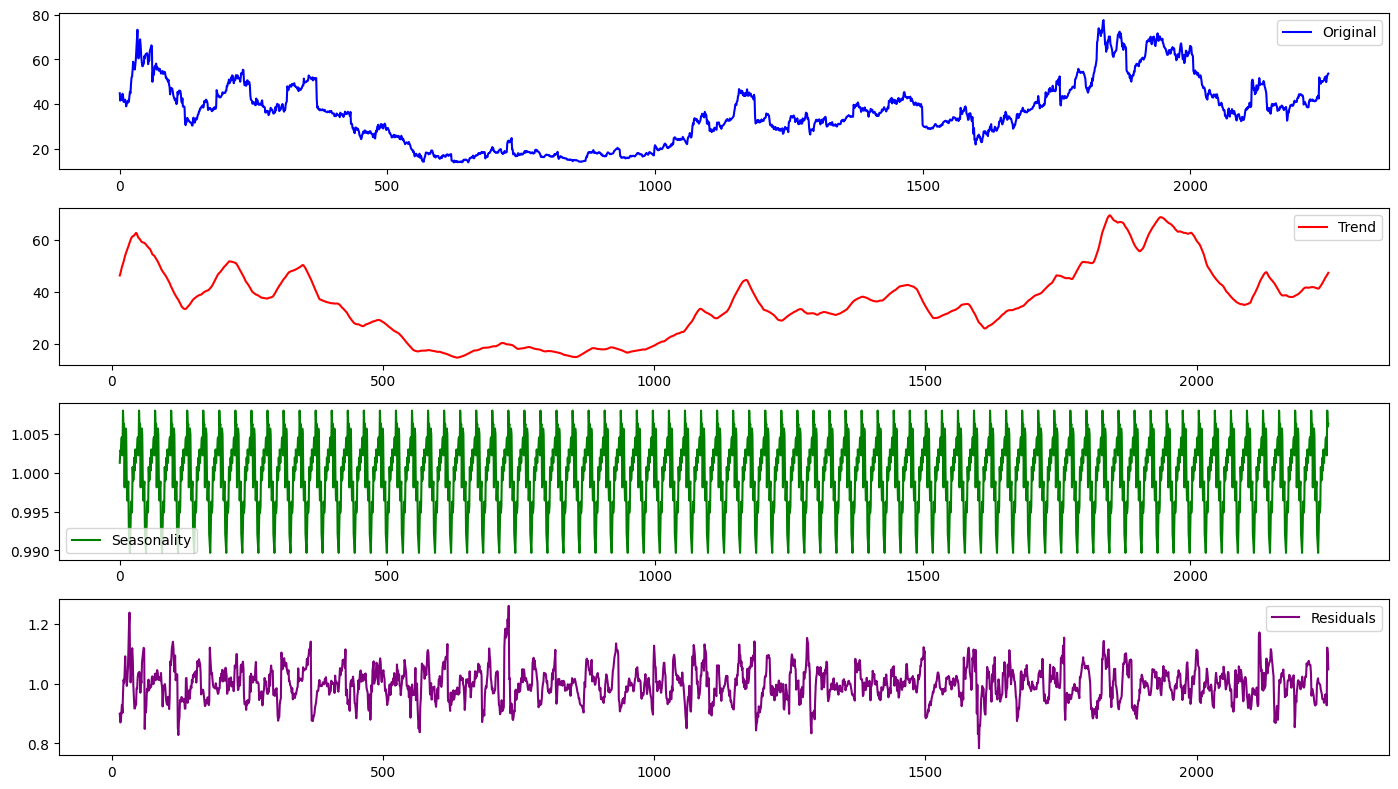

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Date is already the index — we don't need to reset it
close_series = df["Close"].dropna()

result = seasonal_decompose(
    close_series,
    model="multiplicative",
    period=30
)


plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(close_series, label="Original", color="blue")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(result.trend, label="Trend", color="red")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(result.seasonal, label="Seasonality", color="green")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(result.resid, label="Residuals", color="purple")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

# Additive Decomposition

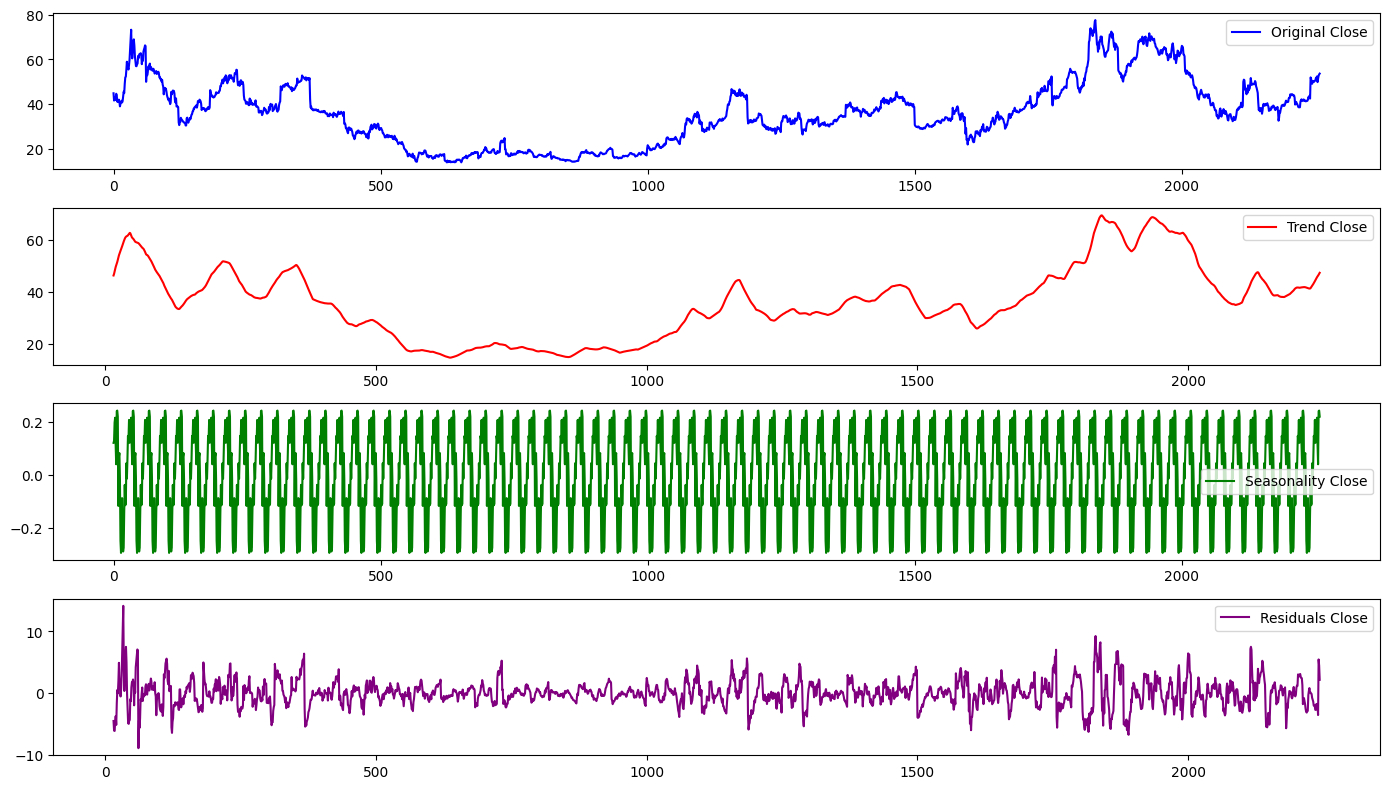

In [38]:
# Performing seasonal decomposition for Close price
result_close = seasonal_decompose(close_series, model="additive", period=30)

# Ploting the decomposition for close price
plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(df["Close"], label="Original Close", color="blue")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(result_close.trend, label="Trend Close", color="red")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(result_close.seasonal, label="Seasonality Close", color="green")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(result_close.resid, label="Residuals Close", color="purple")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


# ADF

In [41]:
from statsmodels.tsa.stattools import adfuller

# Checking for stationarity using the Augmented Dickey-Fuller test
adf_result = adfuller(df["Close"].dropna())
print("\nADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])



ADF Statistic: -2.1353399950688656
p-value: 0.23054362281832141
Critical Values: {'1%': np.float64(-3.433268769289214), '5%': np.float64(-2.862829431836401), '10%': np.float64(-2.567456425475085)}


# ACF

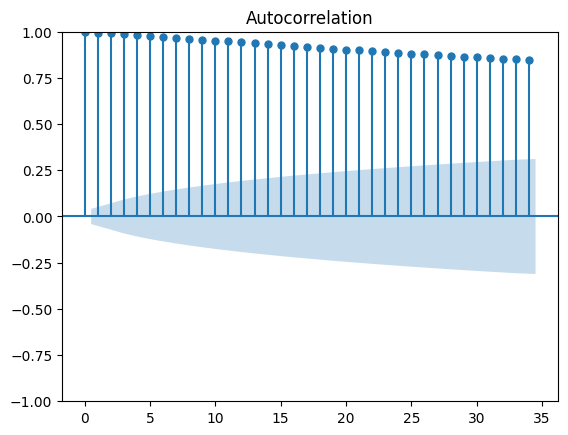

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ploting the ACF for Close price
plot_acf(df["Close"].dropna())
plt.show()


# PACF

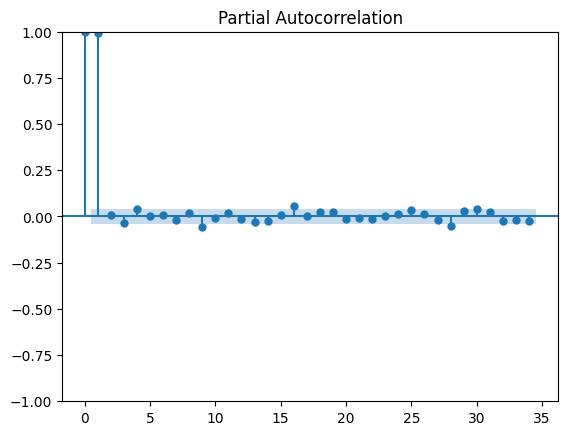

In [47]:
# Ploting the PACF for Close price
plot_pacf(df["Close"].dropna())
plt.show()


# ARIMA

In [50]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 17.8 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=15.14 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5924.184, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5926.867, Time=1.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5926.865, Time=2.43 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5922.186, Time=0.06 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=5926.104, Time=1.43 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=5926.098, Time=1.20 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=5927.061, Time=3.92 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=5924.989, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5924.995, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5925.141, Time=0.70 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 26.622 seconds

Auto-ARIMA summary:

                               SARIMAX Results                                
Dep. Variable:                      y   No. 

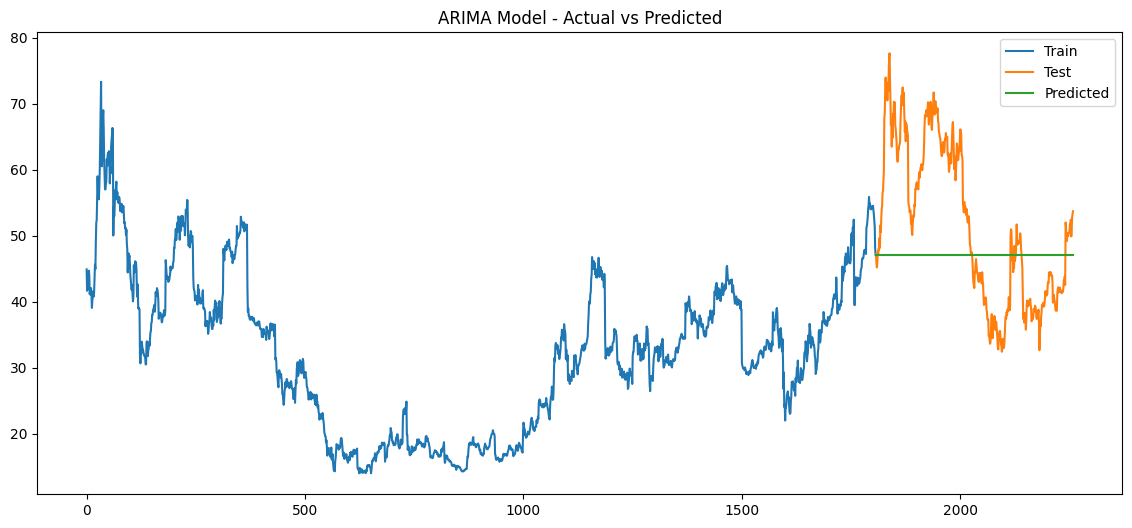

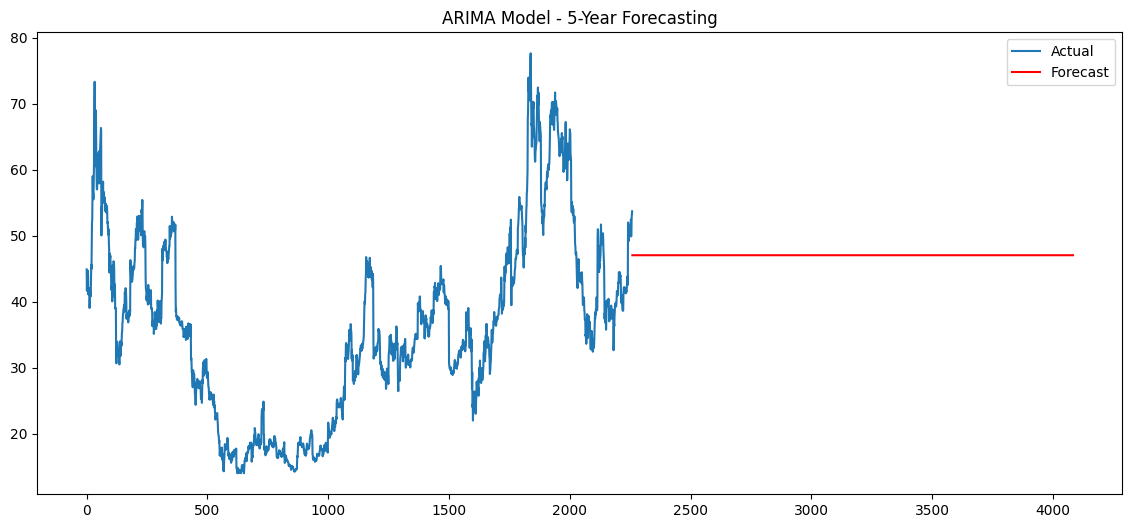

In [51]:
try:
    import pmdarima as pm
    from pmdarima.model_selection import train_test_split as pm_train_test_split
except Exception as e:
    pm = None
    pm_train_test_split = None
    print("\n[WARN] pmdarima not available. Install with: pip install pmdarima")
    print("       Skipping auto_arima section. Error:", e)

# Prepareing series for ARIMA
df_reset = df.reset_index()  # df is currently indexed by Date
df_reset["Date"] = pd.to_datetime(df_reset["Date"])
df_sorted = df_reset.sort_values("Date")
df_close = df_sorted["Close"].dropna()

if pm is not None and pm_train_test_split is not None:
    # Spliting the data into train and test sets
    train, test = pm_train_test_split(df_close, train_size=0.8)

    # Fitting the ARIMA model
    model = pm.auto_arima(
        train,
        seasonal=True,
        m=12,
        suppress_warnings=True,
        error_action="ignore",
        trace=True,
    )

    # Summarizing the ARIMA model
    print("\nAuto-ARIMA summary:\n")
    print(model.summary())

    #  Below is a minimal version to reproduce those plots with the fitted model.
    preds = model.predict(n_periods=len(test))
    plt.figure(figsize=(14, 6))
    plt.plot(train.reset_index(drop=True), label="Train")
    plt.plot(range(len(train), len(train) + len(test)), test.reset_index(drop=True), label="Test")
    plt.plot(range(len(train), len(train) + len(test)), preds, label="Predicted")
    plt.title("ARIMA Model - Actual vs Predicted")
    plt.legend()
    plt.show()

    # 5-year forecasting (approx. 5*365 trading days)
    n_forecast = 5 * 365
    forecast = model.predict(n_periods=n_forecast)
    plt.figure(figsize=(14, 6))
    plt.plot(df_close.reset_index(drop=True), label="Actual")
    plt.plot(range(len(df_close), len(df_close) + n_forecast), forecast, label="Forecast", color="red")
    plt.title("ARIMA Model - 5-Year Forecasting")
    plt.legend()
    plt.show()


# SARIMA/SARIMAX

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

df_sorted = df_reset.sort_values("Date")
df_close = df_sorted["Close"].dropna()

train = df_close[: int(0.8 * len(df_close))]

model_sarimax = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model_sarimax.fit(disp=False)

model_summary = results.summary()
print(model_summary)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1807
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2972.492
Date:                            Sun, 28 Dec 2025   AIC                           5954.983
Time:                                    06:22:53   BIC                           5982.444
Sample:                                         0   HQIC                          5965.122
                                           - 1807                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8696      0.132     -6.587      0.000      -1.128      -0.611
ma.L1          0.8488      0.138   

# Linear Regression

In [57]:
# Printing MAE/MSE/RMSE results
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predicting on remaining test part
test = df_close[int(0.8 * len(df_close)) :]
pred = results.get_forecast(steps=len(test)).predicted_mean

mae = mean_absolute_error(test, pred)
mse = mean_squared_error(test, pred)
rmse = np.sqrt(mse)

print("\nMean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)



Mean Absolute Error: 11.47927594197387
Mean Square Error: 173.43391607452838
Root Mean Square Error: 13.169431121902281


# Distribution of Stock Prices

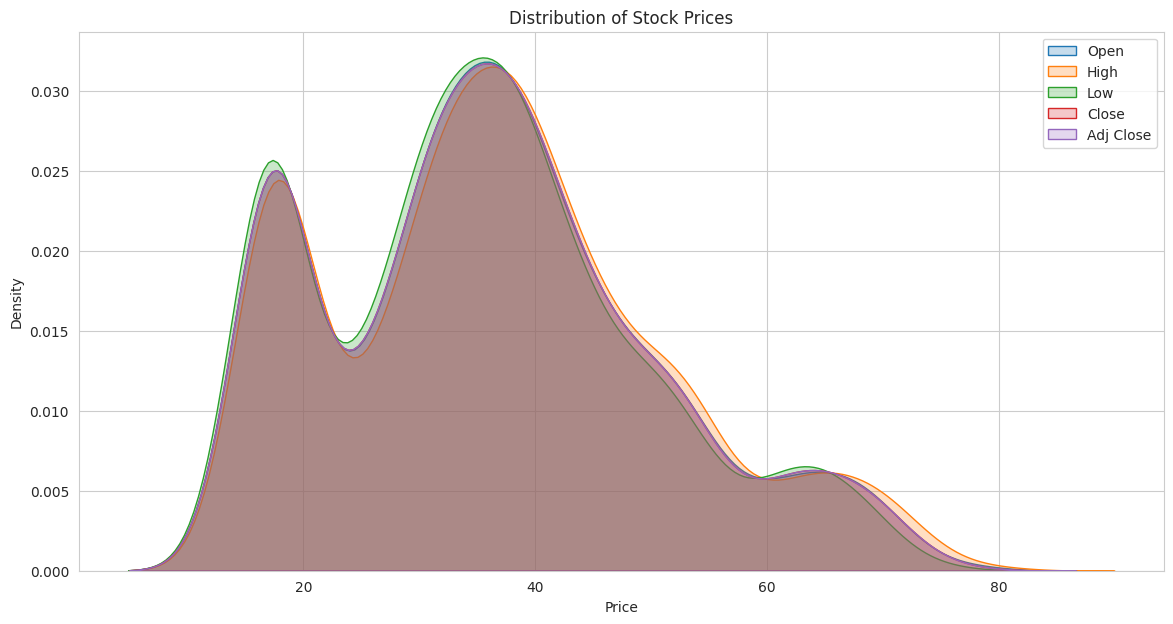

In [60]:
data = df_reset.copy()

sns.set_style("whitegrid")

# Converting the 'Date' column to datetime
data["Date"] = pd.to_datetime(data["Date"])

# Plotting distributions of 'Open', 'High', 'Low', 'Close', 'Adj Close'
plt.figure(figsize=(14, 7))
for feature in ["Open", "High", "Low", "Close", "Adj Close"]:
    sns.kdeplot(data[feature], shade=True, label=feature)

plt.title("Distribution of Stock Prices")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.show()


# Loading Twitter Index

In [2]:
import pandas as pd

# Path to Twitter stock dataset
twitter_path = "/content/drive/MyDrive/datasets/Twitter Stock Market Dataset.csv"

# Load the Twitter stock index data
twitter_data = pd.read_csv(twitter_path, encoding="utf-8")

# Display first few rows
print("Twitter Index Data Head:")
print(twitter_data.head())


Twitter Index Data Head:
         Date       Open       High        Low      Close  Adj Close  \
0  2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1  2013-11-08  45.930000  46.939999  40.685001  41.650002  41.650002   
2  2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3  2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4  2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume  
0  117701670.0  
1   27925307.0  
2   16113941.0  
3    6316755.0  
4    8688325.0  


# Loading MacroEconomics and S&P Index

In [63]:
# Paths to Financial & Macroeconomics Data dataset
financials_path = os.environ.get("FINANCIALS_CSV", "/content/drive/MyDrive/datasets/financials.csv")
macroeconomics_path = os.environ.get("MACROECONOMICS_CSV", "/content/drive/MyDrive/datasets/master_macroeconomics.csv")

if os.path.exists(financials_path) and os.path.exists(macroeconomics_path):
    financials_data = pd.read_csv(financials_path, encoding="utf-8")
    macroeconomics_data = pd.read_csv(macroeconomics_path, encoding="utf-8")

    print("\nFinancials Data Head:")
    print(financials_data.head())
    print("\nMacroeconomics Data Head:")
    print(macroeconomics_data.head())
else:
    print(
        "\n[INFO] financials.csv / master_macroeconomics.csv not found. "
        "Skipping Slide 31 sections (keep files next to this script or set env vars FINANCIALS_CSV/MACROECONOMICS_CSV)."
    )



Financials Data Head:
  Symbol                 Name                  Sector   Price  Price/Earnings  \
0    MMM           3M Company             Industrials  222.89           24.31   
1    AOS      A.O. Smith Corp             Industrials   60.24           27.76   
2    ABT  Abbott Laboratories             Health Care   56.27           22.51   
3   ABBV          AbbVie Inc.             Health Care  108.48           19.41   
4    ACN        Accenture plc  Information Technology  150.51           25.47   

   Dividend Yield  Earnings/Share  52 Week Low  52 Week High    Market Cap  \
0        2.332862            7.92       259.77       175.490  1.387211e+11   
1        1.147959            1.70        68.39        48.925  1.078342e+10   
2        1.908982            0.26        64.60        42.280  1.021210e+11   
3        2.499560            3.29       125.86        60.050  1.813863e+11   
4        1.714470            5.44       162.60       114.820  9.876586e+10   

         EBITDA  Pric

# Arbitrage Pricing Theory (APT)

In [66]:
if os.path.exists(financials_path):
    from tqdm.auto import tqdm

    # Load the Twitter stock data
    twitter_data = df_reset.copy()

    # Calculate daily returns for Twitter stock
    twitter_data["Date"] = pd.to_datetime(twitter_data["Date"])
    twitter_data.sort_values("Date", inplace=True)
    twitter_data["Daily_Return"] = twitter_data["Close"].pct_change()

    # Load the market index data
    financials_data = pd.read_csv(financials_path, encoding="utf-8")
    financials_data["Daily_Return"] = financials_data["Price"].pct_change()

    print("\nTwitter Stock Daily Returns:")
    print(twitter_data[["Date", "Daily_Return"]].head())
    print("\nMarket Index Daily Returns:")
    print(financials_data[["Symbol", "Daily_Return"]].head())


Twitter Stock Daily Returns:
        Date  Daily_Return
0 2013-11-07           NaN
1 2013-11-08     -0.072383
2 2013-11-11      0.030012
3 2013-11-12     -0.023310
4 2013-11-13      0.016706

Market Index Daily Returns:
  Symbol  Daily_Return
0    MMM           NaN
1    AOS     -0.729732
2    ABT     -0.065903
3   ABBV      0.927848
4    ACN      0.387445


In [68]:
    market_daily = financials_data[["Daily_Return"]].dropna()
    expected_market_return = market_daily["Daily_Return"].mean()

    merged_data_cleaned = twitter_data[["Date", "Daily_Return"]].dropna().copy()
    merged_data_cleaned["Expected_Returns"] = expected_market_return
    merged_data_cleaned["Return_Difference"] = (
        merged_data_cleaned["Daily_Return"] - merged_data_cleaned["Expected_Returns"]
    )


Extreme Return Differences

In [73]:
# Identify the dates with the highest positive and negative return differences
extreme_return_differences = pd.concat([
    merged_data_cleaned.nlargest(5, "Return_Difference"),
    merged_data_cleaned.nsmallest(5, "Return_Difference")
])

# Display the dates with the most significant return differences
print("\nDates with the Most Significant Return Differences:")
print(
    extreme_return_differences[
        ["Date", "Daily_Return", "Expected_Returns", "Return_Difference"]
    ].sort_values(by="Return_Difference")
)

extreme_dates = extreme_return_differences["Date"].tolist()


Dates with the Most Significant Return Differences:
           Date  Daily_Return  Expected_Returns  Return_Difference
61   2014-02-06     -0.241625          0.787212          -1.028837
1757 2020-10-30     -0.211139          0.787212          -0.998350
1500 2019-10-24     -0.208087          0.787212          -0.995298
1187 2018-07-27     -0.205403          0.787212          -0.992615
733  2016-10-06     -0.201045          0.787212          -0.988257
999  2017-10-26      0.184948          0.787212          -0.602264
181  2014-07-30      0.199793          0.787212          -0.587419
724  2016-09-23      0.214171          0.787212          -0.573041
2241 2022-10-04      0.222379          0.787212          -0.564833
2115 2022-04-04      0.271178          0.787212          -0.516034


Identifying significant factors

In [115]:
significant_factor_loadings = factor_loading_matrix.abs() > 0.5
significant_factors = significant_factor_loadings.any(axis=1)

print('Significant Factors:')
print(significant_factors[significant_factors].index.tolist())

Significant Factors:
['Gross Domestic Product', 'Unemployment Rate', 'Consumer Price Index', 'Producer Price Index', 'Trade Balance', 'Exchange Rate', 'Interest Rate']


In [81]:
# DATES WITH MOST SIGNIFICANT RETURN DIFFERENCES

extreme_return_differences = pd.concat([
    merged_data_cleaned.nlargest(5, "Return_Difference"),
    merged_data_cleaned.nsmallest(5, "Return_Difference")
])

print("\nDates with the Most Significant Return Differences:")
print(
    extreme_return_differences[
        ["Date", "Daily_Return", "Expected_Returns", "Return_Difference"]
    ].sort_values(by="Return_Difference")
)

# Extract dates for news simulation
extreme_dates = extreme_return_differences["Date"].tolist()


Dates with the Most Significant Return Differences:
           Date  Daily_Return  Expected_Returns  Return_Difference
61   2014-02-06     -0.241625          0.787212          -1.028837
1757 2020-10-30     -0.211139          0.787212          -0.998350
1500 2019-10-24     -0.208087          0.787212          -0.995298
1187 2018-07-27     -0.205403          0.787212          -0.992615
733  2016-10-06     -0.201045          0.787212          -0.988257
999  2017-10-26      0.184948          0.787212          -0.602264
181  2014-07-30      0.199793          0.787212          -0.587419
724  2016-09-23      0.214171          0.787212          -0.573041
2241 2022-10-04      0.222379          0.787212          -0.564833
2115 2022-04-04      0.271178          0.787212          -0.516034


SIMULATED NEWS HEADLINES

In [82]:
news_on_extreme_dates = {
    date: "News headline or event affecting Twitter stock on this date."
    for date in extreme_dates
}

print("\nSimulated News Headlines on Dates with Significant Return Differences:")
for date, news in news_on_extreme_dates.items():
    print(f"Date: {date}, News: {news}")



Simulated News Headlines on Dates with Significant Return Differences:
Date: 2022-04-04 00:00:00, News: News headline or event affecting Twitter stock on this date.
Date: 2022-10-04 00:00:00, News: News headline or event affecting Twitter stock on this date.
Date: 2016-09-23 00:00:00, News: News headline or event affecting Twitter stock on this date.
Date: 2014-07-30 00:00:00, News: News headline or event affecting Twitter stock on this date.
Date: 2017-10-26 00:00:00, News: News headline or event affecting Twitter stock on this date.
Date: 2014-02-06 00:00:00, News: News headline or event affecting Twitter stock on this date.
Date: 2020-10-30 00:00:00, News: News headline or event affecting Twitter stock on this date.
Date: 2019-10-24 00:00:00, News: News headline or event affecting Twitter stock on this date.
Date: 2018-07-27 00:00:00, News: News headline or event affecting Twitter stock on this date.
Date: 2016-10-06 00:00:00, News: News headline or event affecting Twitter stock on